In [47]:
from geopy.distance import great_circle
base_0 = (55.889635, 49.087215)
base = (55.764555, 49.168130)

def get_distance(lat, long):
    return great_circle((lat, long), base_0).m

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [49]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d.%m.%Y %H:%M:%S')
data = pd.read_csv(r'data-1101.csv', header=None, parse_dates=[0], date_parser=dateparse)
data.columns = ['Datetime', 'Latitude', 'Longtitude']
print (data.head())

             Datetime   Latitude  Longtitude
0 2019-11-21 12:21:40  55.847833   49.084300
1 2019-11-21 12:22:40  55.853183   49.084733
2 2019-11-21 12:23:40  55.854183   49.084800
3 2019-11-21 12:24:40  55.854317   49.087033
4 2019-11-21 12:25:40  55.854650   49.090617


In [50]:
data['Distance'] = np.array([get_distance(lat, long) for lat, long in zip(data.Latitude, data.Longtitude)])

In [51]:
len(data)

4196

In [52]:
data = data.set_index(data['Datetime'])
data.head()

Datetime   Latitude  Longtitude     Distance
Datetime                                                                   
2019-11-21 12:21:40 2019-11-21 12:21:40  55.847833   49.084300  4651.733495
2019-11-21 12:22:40 2019-11-21 12:22:40  55.853183   49.084733  4056.239745
2019-11-21 12:23:40 2019-11-21 12:23:40  55.854183   49.084800  3944.966075
2019-11-21 12:24:40 2019-11-21 12:24:40  55.854317   49.087033  3927.204380
2019-11-21 12:25:40 2019-11-21 12:25:40  55.854650   49.090617  3895.945085

In [67]:
data_new = data
data_new = data_new[data_new.Datetime > '25.11.2019']
data_new = data_new[data_new.Datetime < '26.11.2019']

In [68]:
data_new.head()

Datetime   Latitude  Longtitude     Distance
Datetime                                                                   
2019-11-25 06:40:40 2019-11-25 06:40:40  55.886617   49.087283   335.613552
2019-11-25 06:43:40 2019-11-25 06:43:40  55.876400   49.095683  1563.561166
2019-11-25 06:46:40 2019-11-25 06:46:40  55.869400   49.088883  2252.436536
2019-11-25 06:49:40 2019-11-25 06:49:40  55.862233   49.085433  3048.994664
2019-11-25 06:52:40 2019-11-25 06:52:40  55.859317   49.102533  3504.020966

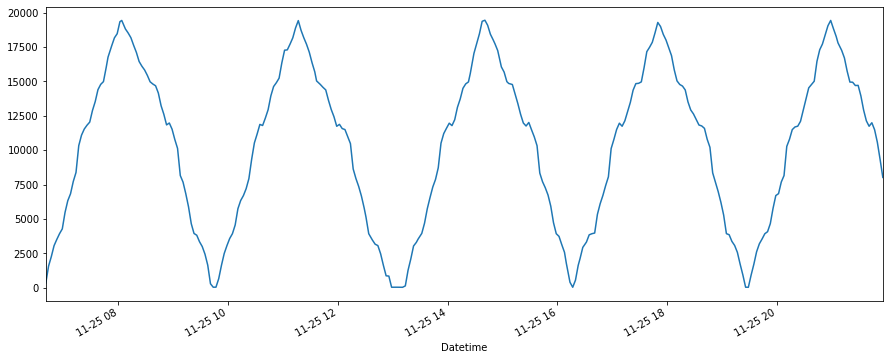

In [69]:
data_new.Distance.plot()

In [44]:
data_new = data_new[data_new.Datetime > '24.11.2019']

# data_new['Delta'] = np.array([0] + [data_new.Datetime[i] - data_new.Datetime[i - 1] for i in data_new.Datetime.index[1:]])
# data_new
scoring = []
for i in range(len(data_new) -1):
    delta = data_new.Datetime[i + 1] - data_new.Datetime[i]
    res = delta.total_seconds()
    if 3600 < res < 14400:
        scoring.append(res)
        print(data_new.Datetime[i+1])
        print(delta)
mean = (np.array(scoring).mean())
print(mean)
print(mean // 3600,  (mean % 3600) // 60)

2019-11-24 16:10:40
0 days 03:09:00
2019-11-24 19:19:40
0 days 03:09:00
2019-11-25 12:58:40
0 days 03:12:00
2019-11-25 16:16:40
0 days 03:06:00
2019-11-25 19:25:40
0 days 03:09:00
2019-11-26 12:52:40
0 days 03:10:00
2019-11-26 16:16:40
0 days 03:06:00
2019-11-26 19:31:40
0 days 03:15:00
2019-11-27 12:55:40
0 days 03:09:00
2019-11-27 16:18:40
0 days 03:05:00
2019-11-28 09:43:40
0 days 03:09:00
2019-11-28 12:55:40
0 days 03:09:00
2019-11-29 09:43:40
0 days 03:06:00
2019-11-29 12:58:40
0 days 03:12:00
2019-11-29 16:16:40
0 days 03:06:00
2019-11-29 19:28:40
0 days 03:12:00
2019-11-30 12:55:40
0 days 03:09:00
2019-11-30 16:19:40
0 days 03:09:00
2019-11-30 19:28:40
0 days 03:09:00
2019-12-01 09:55:40
0 days 03:09:00
2019-12-01 13:07:40
0 days 03:12:00
2019-12-02 13:07:40
0 days 03:12:00
11356.363636363636
3.0 9.0


In [42]:
"""
0 days 03:15:00 пнд
0 days 03:06:00 пнд
0 days 03:09:00 пнд
0 days 03:10:00 вт
0 days 03:09:00 вт
0 days 03:12:00 ср
0 days 03:06:00 чт
0 days 03:12:00 чт
0 days 03:06:00 чт
0 days 03:09:00 пт
0 days 03:09:00 пт
0 days 03:09:00 пт
0 days 03:12:00 сб
"""

'\n0 days 03:15:00 пнд\n0 days 03:06:00 пнд\n0 days 03:09:00 пнд\n0 days 03:10:00 вт\n0 days 03:09:00 вт\n0 days 03:12:00 ср\n0 days 03:06:00 чт\n0 days 03:12:00 чт\n0 days 03:06:00 чт\n0 days 03:09:00 пт\n0 days 03:09:00 пт\n0 days 03:09:00 пт\n0 days 03:12:00 сб\n'

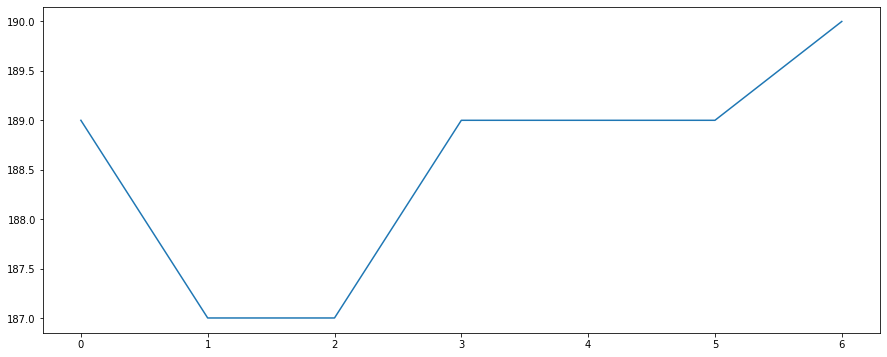

In [46]:
plt.plot(range(7), np.array([9, 7, 7, 9, 9, 9, 10]) + 3*60)